## Curbing Car Crashes in Chicago.

<div align="center">
  <img src="https://github.com/JIMWAMAE/Chicago_car_crashes_project/blob/main/images/Chicago.jpg?raw=true" alt="Chicago">
</div>

* Student name: JIMCOLLINS WAMAE WANGUKU
* Student pace: full time
* Scheduled project review date/time: 24th May 2023
* Instructor name: Lucille Kaleha
* Blog post URL: https://github.com/JIMWAMAE/dsc-phase-1-project
***

### Introduction

Our objective was to develop inferential classification models for the Vehicle Safety Board of Chicago using cleaned and formatted data on crashes, vehicles, and individuals involved in accidents from 2016 to 2020. Our goal was to categorize the primary contributory causes of car accidents into two groups: avoidable and unnavoidable.
***

## Business understanding


The Vehicle Safety Board of Chicago has entrusted us with the task of conducting a comprehensive analysis of car crash data to enhance their understanding of the causes and factors influencing avoidable and unavoidable accidents in the region. Our project aims to delve deep into the available data, spanning from 2016 to 2020, to identify the primary contributory causes of crashes and uncover valuable insights that can drive actionable recommendations.

By leveraging advanced data analysis techniques and employing various classification models, our objective is to decipher the underlying patterns, correlations, and trends within the crash data. This analysis will enable us to differentiate between avoidable and unavoidable accidents, shedding light on the key factors that contribute to each category.

Through this project, we seek to address the following crucial business questions: What are the primary causes of avoidable accidents in Chicago? Which age groups are more susceptible to being involved in avoidable crashes? Are there specific road conditions or locations that pose a higher risk for avoidable accidents?

By gaining a deeper understanding of the factors influencing avoidable accidents, we aim to provide strategic recommendations that will assist the Vehicle Safety Board in formulating effective interventions and policies. These recommendations may include targeted driver education campaigns, infrastructure improvements in high-risk areas, or other measures aimed at reducing the occurrence of avoidable accidents and promoting overall road safety.

Ultimately, our project endeavors to contribute to the mission of the Vehicle Safety Board by providing data-driven insights and actionable recommendations. By equipping the Board with a comprehensive understanding of the causes and factors associated with avoidable accidents, we can collectively work towards creating a safer driving environment for the residents of Chicago and reducing the human and economic toll of car crashes in the region.

## Data understanding

Our analysis focuses on three datasets: vehicles, people, and crashes, provided by the City of Chicago. These datasets contain detailed information on car crashes that occurred between 2016 and 2020. Our task, assigned by the Vehicle Safety Board of Chicago, is to develop an inferential model to differentiate between preventable and less preventable crashes.

We define "Preventable" crashes as those that could have been easily avoided, often due to non-compliance with traffic laws or negligent driving. "Less Preventable" crashes involve factors that require significant resources to address, such as poor road conditions or limited visibility. The datasets provide insights into the vehicles involved, the people affected, and the specific circumstances of each crash.

By analyzing these datasets, we aim to identify patterns, correlations, and key factors that distinguish between preventable and less preventable crashes. This understanding will inform the Board's efforts to implement targeted campaigns and interventions to reduce car crashes in Chicago and improve road safety.




## Data preparation

We conducted thorough data preparation on the provided datasets from the City of Chicago, which included vehicles, people, and crashes data. Our goal was to clean, transform, and integrate the data to ensure its quality and suitability for analysis. By addressing missing values, inconsistencies, we enhanced the reliability and accuracy of the data. Through feature engineering and data integration, we created new variables and established meaningful relationships between the datasets. The data preparation process forms the foundation for our subsequent analysis and modeling, enabling us to derive valuable insights and make informed recommendations to the Vehicle Safety Board of Chicago.

##### Importing libraries

In [82]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, accuracy_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Loading the data

In [3]:
# looading the data

df_crashes = pd.read_csv('data/Crashes.csv')
df_People = pd.read_csv('data/People.csv')
df_Vehicles = pd.read_csv('data/Vehicles.csv')


#### 1. Crashes data cleaning

In [4]:
df_crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


We will go ahead and check for null values in our crashes data.

In [5]:
df_crashes.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4598
CRASH_DATE_EST_I                 668460
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         524138
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       20306
CRASH_TYPE                            0
INTERSECTION_RELATED_I           557272
NOT_RIGHT_OF_WAY_I               689379
HIT_AND_RUN_I                    498002
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


We have to consider what data will be important for our modeling based on the problem domain and some of the columns will not really help us to generate insights frm our data. Therefore we will drop the columns below before proceeding to dealing the missing data. 

In [6]:
# Creating a function to remove irrelevant columns 
def ignore(data,columns_to_ignore):
    delete_cols = data.drop(columns_to_ignore,axis=1).copy()
    return delete_cols



In [7]:
# Identifying the columns to ignore from crashes data 
columns_to_ignore = ['REPORT_TYPE','DATE_POLICE_NOTIFIED', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE','LANE_CNT',
 'SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION', 'STREET_NAME','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 
'BEAT_OF_OCCURRENCE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING', 
'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
'INJURIES_UNKNOWN']

# calling the function to drop the identified columns
df_crashes_clean = ignore(df_crashes,columns_to_ignore)

Some of the columns we have left have so many entries missing and therefore they will not be of help with the moddeling and therefore we will drop the entire columns. There are others like Longitude, Latitude and Location that have just a few missing entries and we will therefore only eliminat the missing rows.

In [8]:
df_crashes_clean.isna().sum()

CRASH_RECORD_ID                 0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I     557272
NOT_RIGHT_OF_WAY_I         689379
HIT_AND_RUN_I              498002
DAMAGE                          0
PRIM_CONTRIBUTORY_CAUSE         0
DOORING_I                  720954
WORK_ZONE_I                718930
WORK_ZONE_TYPE             719850
WORKERS_PRESENT_I          722055
NUM_UNITS                       0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LATITUDE                     4679
LONGITUDE                    4679
LOCATION                     4679
dtype: int64

We will now go ahead and deal with the missing data from our data. Some of the columns have more than 50% of the data missing where some have less than 10% of the data missing.
Compared to total number of values  488,290, we have majority of values missing for 'Intersection_related', 'Not_right_of_way', 'Hit_and_run', 'Dooring', 'Work_zone', 'Work_Zone_Type', and 'Workers_Present'. This will therefore require us to remove these columns as well. 

In [9]:
# A function to drop missing data columns
def drop_missing(data,columns_to_ignore):
    delete_cols = data.drop(columns_to_ignore,axis=1).copy()
    return delete_cols


In [10]:
# Identifying the columns to drop
columns_missing = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']
#calling the function do drop the missing data.
df_crashes_clean = drop_missing(df_crashes_clean,columns_missing)

Having dropped the missing data columns we will now drop the missing data rows that contained less than 10% of the data missing.

In [11]:
# Looking up the remaining missing data
df_crashes_clean.isna().sum()

CRASH_RECORD_ID               0
POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
ALIGNMENT                     0
ROADWAY_SURFACE_COND          0
ROAD_DEFECT                   0
CRASH_TYPE                    0
DAMAGE                        0
PRIM_CONTRIBUTORY_CAUSE       0
NUM_UNITS                     0
CRASH_HOUR                    0
CRASH_DAY_OF_WEEK             0
CRASH_MONTH                   0
LATITUDE                   4679
LONGITUDE                  4679
LOCATION                   4679
dtype: int64

We have eliminated the majority of the missing data . We want a clean data set therefore leaving no stone unturned we will go ahead to finaly dropna the remaining missing values.

In [12]:
# Dropping the remaining rows of missing data
df_crashes_clean.dropna(axis=0, inplace=True)

In [13]:
# Looking up the missing values.
df_crashes_clean.isna().sum()

CRASH_RECORD_ID            0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
NUM_UNITS                  0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

In [14]:
df_crashes_clean.shape

(718461, 21)

Success!!! We have dealt with the missing data as well as the columns to ignore. We started off with 49 columns down to 21 columns.

From this data set our target variable will be the primary contributor of crashes which helps us identify what caused the most crashes in chicago.

In [15]:
# Looking up our target variable
df_crashes_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 277269
FAILING TO YIELD RIGHT-OF-WAY                                                        78544
FOLLOWING TOO CLOSELY                                                                71166
NOT APPLICABLE                                                                       37883
IMPROPER OVERTAKING/PASSING                                                          34912
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30575
IMPROPER BACKING                                                                     28947
IMPROPER LANE USAGE                                                                  26137
IMPROPER TURNING/NO SIGNAL                                                           23751
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  23484
DISREGARDING TRAFFIC SIGNALS                                                         13912

From this we can identify that the majority of the crashes happen without the primary contributor being identified. This will not help us in curbing the crashes in chicago for we would like to get down to accidents root cause. Equally the 4th contributor of accidents is not applicable and equally should be dropped.

In [16]:
# Dropping Not applicable and unable to determine from our dataset
df_crashes_clean = df_crashes_clean[(df_crashes_clean.PRIM_CONTRIBUTORY_CAUSE != 'UNABLE TO DETERMINE') &
(df_crashes_clean.PRIM_CONTRIBUTORY_CAUSE != 'NOT APPLICABLE')].copy()

In [17]:
# Checking the number of rows and columns of our clean data set
df_crashes_clean.shape

(403309, 21)

#### 2. People data cleaning.

We will perfom a similar proces for our second data set so as to come up with a clean data set.

In [18]:
# displaying first five rows
df_People.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [19]:
#checking null values
df_People.isna().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
RD_NO                      10529
VEHICLE_ID                 31009
CRASH_DATE                     0
SEAT_NO                  1264646
CITY                      428450
STATE                     412521
ZIPCODE                   526883
SEX                        25179
AGE                       461584
DRIVERS_LICENSE_STATE     653691
DRIVERS_LICENSE_CLASS     799546
SAFETY_EQUIPMENT            4473
AIRBAG_DEPLOYED            29812
EJECTION                   19354
INJURY_CLASSIFICATION        688
HOSPITAL                 1314559
EMS_AGENCY               1417344
EMS_RUN_NO               1557667
DRIVER_ACTION             323587
DRIVER_VISION             324040
PHYSICAL_CONDITION        322708
PEDPEDAL_ACTION          1555962
PEDPEDAL_VISIBILITY      1556020
PEDPEDAL_LOCATION        1555963
BAC_RESULT                322565
BAC_RESULT VALUE         1583513
CELL_PHONE_USE           1584214
dtype: int

Thats alot of missing data and it bascally helps us get rid of the columns that will not be of help in reducing the car crashes in chicago and thue we will first drop irrelevant columns. We will mainly remain with the columns that contain information that led to the accidents occurence rater that details about the drivers and dates.

In [20]:
#Identifying columns to drop
columns_to_ignore_2 = [ 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'PERSON_ID', 'RD_NO', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 
'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO','ZIPCODE','PEDPEDAL_LOCATION','BAC_RESULT']

#calling function to drop the columns
df_People_clean = ignore(df_People,columns_to_ignore_2)

We will now handle the missing data from the remainin set of data

In [21]:
#Missing values
df_People_clean.isna().sum()

PERSON_TYPE                  0
CRASH_RECORD_ID              0
VEHICLE_ID               31009
SEX                      25179
AGE                     461584
DRIVER_ACTION           323587
DRIVER_VISION           324040
PHYSICAL_CONDITION      322708
PEDPEDAL_ACTION        1555962
PEDPEDAL_VISIBILITY    1556020
BAC_RESULT VALUE       1583513
CELL_PHONE_USE         1584214
dtype: int64

From this we can see that we have columns missing more than 1.5 million rows which translated to over 87% of the data. The rows are PEDPEDAL_ACTION, PEDPEDAL_VISIBILITY, BAC_RESULT VALUE, CELL_PHONE_USE.

In [22]:
# Identifying the columns to drop
columns_missing_2 = ['PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']


# Calling the function to drop missing values columns
df_People_clean = drop_missing(df_People_clean,columns_missing_2)

In [23]:
df_People_clean.isna().sum()

PERSON_TYPE                0
CRASH_RECORD_ID            0
VEHICLE_ID             31009
SEX                    25179
AGE                   461584
DRIVER_ACTION         323587
DRIVER_VISION         324040
PHYSICAL_CONDITION    322708
dtype: int64

Definately thats not all since we only had two columns without missing data and therefore we can not rush to dropna the remaining missing values since equaly they are many. We will look up the value counts first.

In [24]:
# Value_counts
df_People_clean.SEX.value_counts()


M    820006
F    597132
X    143055
Name: SEX, dtype: int64

In [25]:
# remove x from sex and set age to positive values
df_People_clean=df_People_clean[(df_People_clean['SEX'] != 'X')]
df_People_clean=df_People_clean[(df_People_clean['AGE'] > 0 )]

In [26]:
#Person value count
df_People_clean.PERSON_TYPE.value_counts()

DRIVER                 892565
PASSENGER              190672
PEDESTRIAN              16547
BICYCLE                  9054
NON-MOTOR VEHICLE         340
NON-CONTACT VEHICLE        86
Name: PERSON_TYPE, dtype: int64

We only want data to do with the drivers thus remove the others.

In [27]:
# selecting driver alone
df_People_clean=df_People_clean[(df_People_clean['PERSON_TYPE'] == 'DRIVER')]

Having eliminated rows based on logic we will now look up the missing values.

In [28]:
#Missing values
df_People_clean.isna().sum()

PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID            397
SEX                     0
AGE                     0
DRIVER_ACTION           0
DRIVER_VISION           0
PHYSICAL_CONDITION      0
dtype: int64

We now have a better data set and we will now drop the null values in the vihecle id column.

In [29]:
# Dropping the remaining rows of missing data
df_People_clean.dropna(axis=0, inplace=True)

In [30]:
#Missing values
df_People_clean.isna().sum()

PERSON_TYPE           0
CRASH_RECORD_ID       0
VEHICLE_ID            0
SEX                   0
AGE                   0
DRIVER_ACTION         0
DRIVER_VISION         0
PHYSICAL_CONDITION    0
dtype: int64

In [31]:
#shape of our remaining data
df_People_clean.shape

(892168, 8)

#### 3. Vehicles data cleaning 

Similarly we will clean this data set to obtain a useful dataset for our modelling.

In [32]:
# first five rows
df_Vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1,DRIVER,NaN,1478881.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1554881,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,2,DRIVER,1.0,1478892.0,NaN,ISUZU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


72 columns!!! Thats a huge dataset which definately requires dropping of some columns which contain general information before we proceed to handling missing data.

In [33]:
# Dropping columns that we do not require
columns_to_ignore_3 = ['NUM_PASSENGERS', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'CMRC_VEH_I','LIC_PLATE_STATE','TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'TOWED_BY','TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I','AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I','AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I','CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO','COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE','CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO','HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO','MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I','MCS_VIO_CAUSE_CRASH_I', 
                       'IDOT_PERMIT_NO', 'WIDE_LOAD_I','MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS','TRAILER1_WIDTH', 'TRAILER2_WIDTH','CRASH_UNIT_ID', 'RD_NO', 'CRASH_DATE', 
                       'TRAILER1_LENGTH','TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG','CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I'
                       ]
df_Vehicles_clean = ignore(df_Vehicles,columns_to_ignore_3)

In [34]:
#checking for null values
df_Vehicles_clean.isna().sum()

CRASH_RECORD_ID               0
UNIT_NO                       0
UNIT_TYPE                  2008
VEHICLE_ID                33157
VEHICLE_DEFECT            33157
VEHICLE_TYPE              33157
VEHICLE_USE               33157
TRAVEL_DIRECTION          33157
MANEUVER                  33157
EXCEED_SPEED_LIMIT_I    1471104
FIRST_CONTACT_POINT       36241
dtype: int64

What we have left is a smaller dataset with some missing values which require attention. We will have to do away with the column exceed speed limit which has so many missing values.

In [35]:
# column to drop
columnss = ['EXCEED_SPEED_LIMIT_I']
# call function to drop missing values
df_Vehicles_clean = drop_missing(df_Vehicles_clean,columnss)

We have six columns with the same amount of missing values and therefore since they contribute to a small percentage of the data we will drop the missing rows of data.

In [36]:
#droping null values
df_Vehicles_clean.dropna(axis=0, inplace=True)

We now have three clean data sets and for our modelling we will require to merge then into one data set using common columns between them.

#### Merging the datasets

We will now perfom inner joins between the datasets to have one dataset all together. The Vehicle and people datasets will be merged using the common column vihecle id and the merged datasets will further be merged to crashes dataset using crash record id.

In [37]:
# First merger
df_Vih_Pep = pd.merge(df_People_clean, df_Vehicles_clean, on=['VEHICLE_ID'], how = 'inner')


In [38]:
#first five columns
df_Vih_Pep.head()

,PERSON_TYPE,CRASH_RECORD_ID_x,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,CRASH_RECORD_ID_y,UNIT_NO,UNIT_TYPE,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,FIRST_CONTACT_POINT
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,M,25.0,UNKNOWN,UNKNOWN,UNKNOWN,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,FRONT
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,M,37.0,NONE,NOT OBSCURED,NORMAL,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,SIDE-RIGHT-FRONT
2,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348.0,F,34.0,UNKNOWN,NOT OBSCURED,NORMAL,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,NE,MERGING,FRONT-LEFT-CORNER
3,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,832624.0,M,53.0,UNKNOWN,UNKNOWN,NORMAL,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,1,DRIVER,UNKNOWN,BUS OVER 15 PASS.,CTA,E,TURNING LEFT,SIDE-LEFT
4,DRIVER,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,833984.0,M,65.0,UNKNOWN,UNKNOWN,NORMAL,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,FRONT-RIGHT-CORNER


In [39]:
# crashes first five columns
df_crashes_clean.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",2,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,2,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
7,01aaa759c6bbefd0f584226fbd88bdc549de3ed1e46255...,40,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER LANE USAGE,2,17,6,7,41.975826,-87.650420,POINT (-87.650419778017 41.975826016449)
10,7b4700df143a2170b338fdf28c3ccb7c3aaa4527b0734e...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,2,10,2,11,41.744152,-87.585945,POINT (-87.585945066953 41.744151639042)


We will need to rename the column on the first merger for the crashes Id so that we can now merge it to crashes dataset.

In [40]:
# Renaming a column
df_Vih_Pep.rename(columns={'CRASH_RECORD_ID_x': 'CRASH_RECORD_ID'}, inplace=True)

In [41]:
# Second merger
df_combined = pd.merge(df_Vih_Pep, df_crashes_clean, on=['CRASH_RECORD_ID'], how='inner')

In [42]:
# First five rows
df_combined.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,CRASH_RECORD_ID_y,UNIT_NO,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,M,37.0,NONE,NOT OBSCURED,NORMAL,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,2,...,NO INJURY / DRIVE AWAY,$500 OR LESS,IMPROPER OVERTAKING/PASSING,2,22,2,4,41.736044,-87.653404,POINT (-87.653404241798 41.736044089544)
1,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348.0,F,34.0,UNKNOWN,NOT OBSCURED,NORMAL,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,1,...,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER OVERTAKING/PASSING,2,18,1,2,41.997662,-87.700128,POINT (-87.700128203434 41.99766204922)
2,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805338.0,M,36.0,UNKNOWN,NOT OBSCURED,NORMAL,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,2,...,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER OVERTAKING/PASSING,2,18,1,2,41.997662,-87.700128,POINT (-87.700128203434 41.99766204922)
3,DRIVER,49336aaca932f7935c361c892d31e01360a08133079e3a...,834553.0,M,26.0,IMPROPER BACKING,WINDSHIELD (WATER/ICE),NORMAL,49336aaca932f7935c361c892d31e01360a08133079e3a...,1,...,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,2,12,3,5,41.931414,-87.759020,POINT (-87.759019512841 41.931414096945)
4,DRIVER,49336aaca932f7935c361c892d31e01360a08133079e3a...,834560.0,F,64.0,NONE,NOT OBSCURED,NORMAL,49336aaca932f7935c361c892d31e01360a08133079e3a...,2,...,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,2,12,3,5,41.931414,-87.759020,POINT (-87.759019512841 41.931414096945)


In [43]:
df_combined.shape

(577689, 37)

Having cleaned and merged our data we have a total of 577689 rows and 37 columns for the combined dataset.

#### Feature engineering

Feature engineering is the process of transforming raw data into meaningful features that can be used by machine learning algorithms to make accurate predictions or classifications. It involves selecting, creating, and transforming variables (features) in a dataset our to improve the performance of a machine learning model.

The goal of feature engineering is to extract the most relevant information from the available data and represent it in a way that best captures the underlying patterns and relationships. 

##### 1. Target variable feature engineering.

This involves feature engineering the primary contributory cause variable so as to come up with a target for our model. The column has 38 unique values of which can be separated into two main values which are Avoidable or un avoidable situations that lead to an accident.

In [44]:
#Posiible target attributes
Target = list(df_combined.PRIM_CONTRIBUTORY_CAUSE.unique())
Target


['IMPROPER OVERTAKING/PASSING',
 'IMPROPER BACKING',
 'IMPROPER LANE USAGE',
 'FOLLOWING TOO CLOSELY',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
 'DRIVING ON WRONG SIDE/WRONG WAY',
 'IMPROPER TURNING/NO SIGNAL',
 'DISREGARDING TRAFFIC SIGNALS',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'DISREGARDING OTHER TRAFFIC SIGNS',
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
 'WEATHER',
 'EQUIPMENT - VEHICLE CONDITION',
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
 'RELATED TO BUS STOP',
 'DISTRACTION - FROM OUTSIDE VEHICLE',
 'DISREGARDING ROAD MARKINGS',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
 'DISREGARDING STOP SIGN',
 'DISTRACTION - FROM INSIDE VEHICLE',
 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
 'TEXTING',
 'PHYSICAL CONDITION OF DRIVER',
 'ANIMAL',
 'ROAD CONSTRUCTION/MAINTENANCE',
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT

In [45]:
len(Target)

38

We intend to have two scenarios out of the 38 whereby an accident would either be Avoidable or Unavoidable. We will go throught the 38 scenarios to identify whether the driver would avoid it or not. We will then assign 1 to avoidable accidents and 0 to unavoidable accidents.

In [46]:
df_combined['PRIM_CONTRIBUTORY_CAUSE'] = df_combined.PRIM_CONTRIBUTORY_CAUSE.map({
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':0,
    'DISTRACTION - FROM INSIDE VEHICLE':0,
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':0,
    'WEATHER':0,
    'DISTRACTION - FROM OUTSIDE VEHICLE':0,
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':0,
    'OBSTRUCTED CROSSWALKS':0,
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'FAILING TO YIELD RIGHT-OF-WAY':0,
    'FAILING TO REDUCE SPEED TO AVOID CRASH':1,
    'PHYSICAL CONDITION OF DRIVER':0,
    'TEXTING':1,
    'ROAD CONSTRUCTION/MAINTENANCE':0,
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':0,
    'ANIMAL':0,
    'CELL PHONE USE OTHER THAN TEXTING':1,
    'RELATED TO BUS STOP':0,
    'TURNING RIGHT ON RED':1,
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':0,
    'PASSING STOPPED SCHOOL BUS':1,
    'EQUIPMENT - VEHICLE CONDITION':0,
    'IMPROPER OVERTAKING/PASSING':1,
    'DISREGARDING TRAFFIC SIGNALS':1,
    'IMPROPER TURNING/NO SIGNAL':1,
    'FOLLOWING TOO CLOSELY':1,
    'IMPROPER BACKING':1,
    'IMPROPER LANE USAGE':1,
    'DISREGARDING STOP SIGN':1,
    'DISREGARDING OTHER TRAFFIC SIGNS':1,
    'DRIVING ON WRONG SIDE/WRONG WAY':1,
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':1,
    'DISREGARDING ROAD MARKINGS':1,
    'DISREGARDING YIELD SIGN':1,
    'EXCEEDING AUTHORIZED SPEED LIMIT':1,
    'EXCEEDING SAFE SPEED FOR CONDITIONS':1,
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':1,
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':1
})

In [47]:
df_combined.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,SEX,AGE,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,CRASH_RECORD_ID_y,UNIT_NO,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,M,37.0,NONE,NOT OBSCURED,NORMAL,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,2,...,NO INJURY / DRIVE AWAY,$500 OR LESS,1,2,22,2,4,41.736044,-87.653404,POINT (-87.653404241798 41.736044089544)
1,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348.0,F,34.0,UNKNOWN,NOT OBSCURED,NORMAL,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,1,...,NO INJURY / DRIVE AWAY,"OVER $1,500",1,2,18,1,2,41.997662,-87.700128,POINT (-87.700128203434 41.99766204922)
2,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805338.0,M,36.0,UNKNOWN,NOT OBSCURED,NORMAL,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,2,...,NO INJURY / DRIVE AWAY,"OVER $1,500",1,2,18,1,2,41.997662,-87.700128,POINT (-87.700128203434 41.99766204922)
3,DRIVER,49336aaca932f7935c361c892d31e01360a08133079e3a...,834553.0,M,26.0,IMPROPER BACKING,WINDSHIELD (WATER/ICE),NORMAL,49336aaca932f7935c361c892d31e01360a08133079e3a...,1,...,NO INJURY / DRIVE AWAY,"OVER $1,500",1,2,12,3,5,41.931414,-87.759020,POINT (-87.759019512841 41.931414096945)
4,DRIVER,49336aaca932f7935c361c892d31e01360a08133079e3a...,834560.0,F,64.0,NONE,NOT OBSCURED,NORMAL,49336aaca932f7935c361c892d31e01360a08133079e3a...,2,...,NO INJURY / DRIVE AWAY,"OVER $1,500",1,2,12,3,5,41.931414,-87.759020,POINT (-87.759019512841 41.931414096945)


In [48]:
df_combined.PRIM_CONTRIBUTORY_CAUSE.value_counts()

1    375151
0    202538
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

We will create a histogram to visualize the distribution between avoidable and un avoidable accidents.

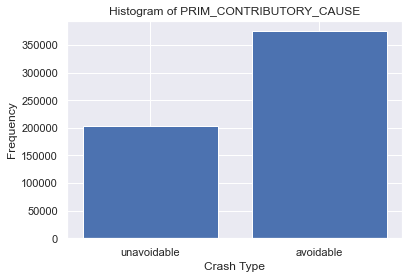

In [177]:
#Function to plot the distribution
def plot_binary_histogram(data, column_name):
    counts = data[column_name].value_counts()
    labels = ['unavoidable', 'avoidable']
    values = [counts[0], counts[1]]

    plt.bar(labels, values)
    plt.xlabel('Crash Type')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column_name)
    plt.show()

# Call the function
plot_binary_histogram(df_combined, 'PRIM_CONTRIBUTORY_CAUSE')

From the visualization it is evident that most accidents that happened in chicago are avoidable. Lets proceed to modelling to identify causes of the accidents and what can be done to mitigate the accidents.

We have come up with our target, we now need to feature engineer our model predictors.

##### 2. Model predictors feature engineering

For our modeling we will use various predictors from our dataset to predict the occurence rate of our target variable. We will repeayt the process for the target where we will look up the value counts of each and feature engineer them to best suit our model.

In [49]:
# pysical condition column
df_combined.PHYSICAL_CONDITION.value_counts()

NORMAL                          498788
UNKNOWN                          64073
IMPAIRED - ALCOHOL                4395
FATIGUED/ASLEEP                   2382
REMOVED BY EMS                    2067
OTHER                             1851
EMOTIONAL                         1755
ILLNESS/FAINTED                    942
HAD BEEN DRINKING                  559
IMPAIRED - DRUGS                   503
IMPAIRED - ALCOHOL AND DRUGS       260
MEDICATED                          114
Name: PHYSICAL_CONDITION, dtype: int64

For this particular column we can use the normal and unknown values and then convert the rest to Unphysical.

In [50]:
#engineering physical condition
df_combined.PHYSICAL_CONDITION = df_combined.PHYSICAL_CONDITION.apply(lambda x: 'UNPHYSICAL' if x not in ['NORMAL', 'UNKNOWN'] else x)

In [51]:
# Engineering Road defect
df_combined.ROAD_DEFECT.value_counts()

NO DEFECTS           494400
UNKNOWN               72455
RUT, HOLES             3453
OTHER                  3284
WORN SURFACE           2455
SHOULDER DEFECT        1152
DEBRIS ON ROADWAY       490
Name: ROAD_DEFECT, dtype: int64

For road defect we can have no defect ,deffect and unknown

In [52]:
df_combined.ROAD_DEFECT = df_combined.ROAD_DEFECT.apply(lambda x: 'DEFECTS' if x not in ['NO DEFECTS', 'UNKNOWN'] else x)

In [53]:
# Feature engineering road surface condition
df_combined.ROADWAY_SURFACE_COND.value_counts()

DRY                437677
WET                 89277
UNKNOWN             22496
SNOW OR SLUSH       21727
ICE                  5074
OTHER                1266
SAND, MUD, DIRT       172
Name: ROADWAY_SURFACE_COND, dtype: int64

For the surface condition we will keep (DRY,WET,OTHER,UNKNOWN, SAND/MUD/DIRT) for snow and ice we will have it as winter and 

In [54]:
df_combined.ROADWAY_SURFACE_COND = df_combined.ROADWAY_SURFACE_COND.apply(lambda x: 'WINTER' if x in ['SNOW OR SLUSH','ICE'] else x)

In [55]:
#weather condition
df_combined.WEATHER_CONDITION.value_counts()

CLEAR                       461583
RAIN                         57826
SNOW                         23114
CLOUDY/OVERCAST              20435
UNKNOWN                       9348
OTHER                         1816
FREEZING RAIN/DRIZZLE         1250
SLEET/HAIL                     935
FOG/SMOKE/HAZE                 921
BLOWING SNOW                   343
SEVERE CROSS WIND GATE         114
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

For weather condition BLOWING SNOW can be combined with SNOW as SNOW.
FREEZING RAIN/DRIZZLE and SLEET/HAIL both occurs during a rain. We will combine them with rain.
FOG/SMOKE/HAZE, SEVERE CROSS WIND GATE, and BLOWING SAND, SOIL, DIRT, are all unique scenarios but with very low number of instances. We will group them with OTHER to reduce variation and increase number of class observation.

In [56]:
# Feature engineering weather condition
df_combined.WEATHER_CONDITION = df_combined.WEATHER_CONDITION.apply(lambda x: 'SNOW' if x == 'BLOWING SNOW' else x)
df_combined.WEATHER_CONDITION = df_combined.WEATHER_CONDITION.apply(lambda x: 'RAIN' if x in ['FREEZING RAIN/DRIZZLE',
                                                                                        'SLEET/HAIL'] else x)
df_combined.WEATHER_CONDITION = df_combined.WEATHER_CONDITION.apply(lambda x: 'OTHER' if x in ['FOG/SMOKE/HAZE',
                                                                                         'SEVERE CROSS WIND GATE',
                                                                                         'BLOWING SAND, SOIL, DIRT'] else x)

Driver vision Future engineering

In [57]:
# vision value counts
df_combined.DRIVER_VISION.value_counts()

NOT OBSCURED              402751
UNKNOWN                   154396
OTHER                       7218
MOVING VEHICLES             5407
PARKED VEHICLES             3338
WINDSHIELD (WATER/ICE)      2460
BLINDED - SUNLIGHT          1158
TREES, PLANTS                374
BUILDINGS                    306
BLINDED - HEADLIGHTS          75
HILLCREST                     65
EMBANKMENT                    63
BLOWING MATERIALS             53
SIGNBOARD                     25
Name: DRIVER_VISION, dtype: int64

For driver vision we will have not obscured, obscured and unknown all the others will appear as obscured vision.

In [58]:
# Feature engineering driver vision
df_combined.DRIVER_VISION = df_combined.DRIVER_VISION.apply(lambda x: 'OBSCURED' if x not in ['NOT OBSCURED', 'UNKNOWN'] else x)

In [59]:
df_combined.shape

(577689, 37)

Having done feature engineering we will now proceed to Explaratory data analysis. 

#### Explaratory data analysis


Exploratory Data Analysis (EDA) is a crucial step in any data science project. It involves the process of examining and understanding the characteristics, patterns, and relationships within the dataset before applying any modeling techniques. 

##### 1. Correlation checks

We will now perfom correlation checks between our variable. It's important to note that correlation does not imply causation. While a high correlation between two variables suggests a relationship, it does not necessarily mean one variable causes the other. Careful analysis, domain knowledge, and additional statistical tests are required to establish causal relationships.

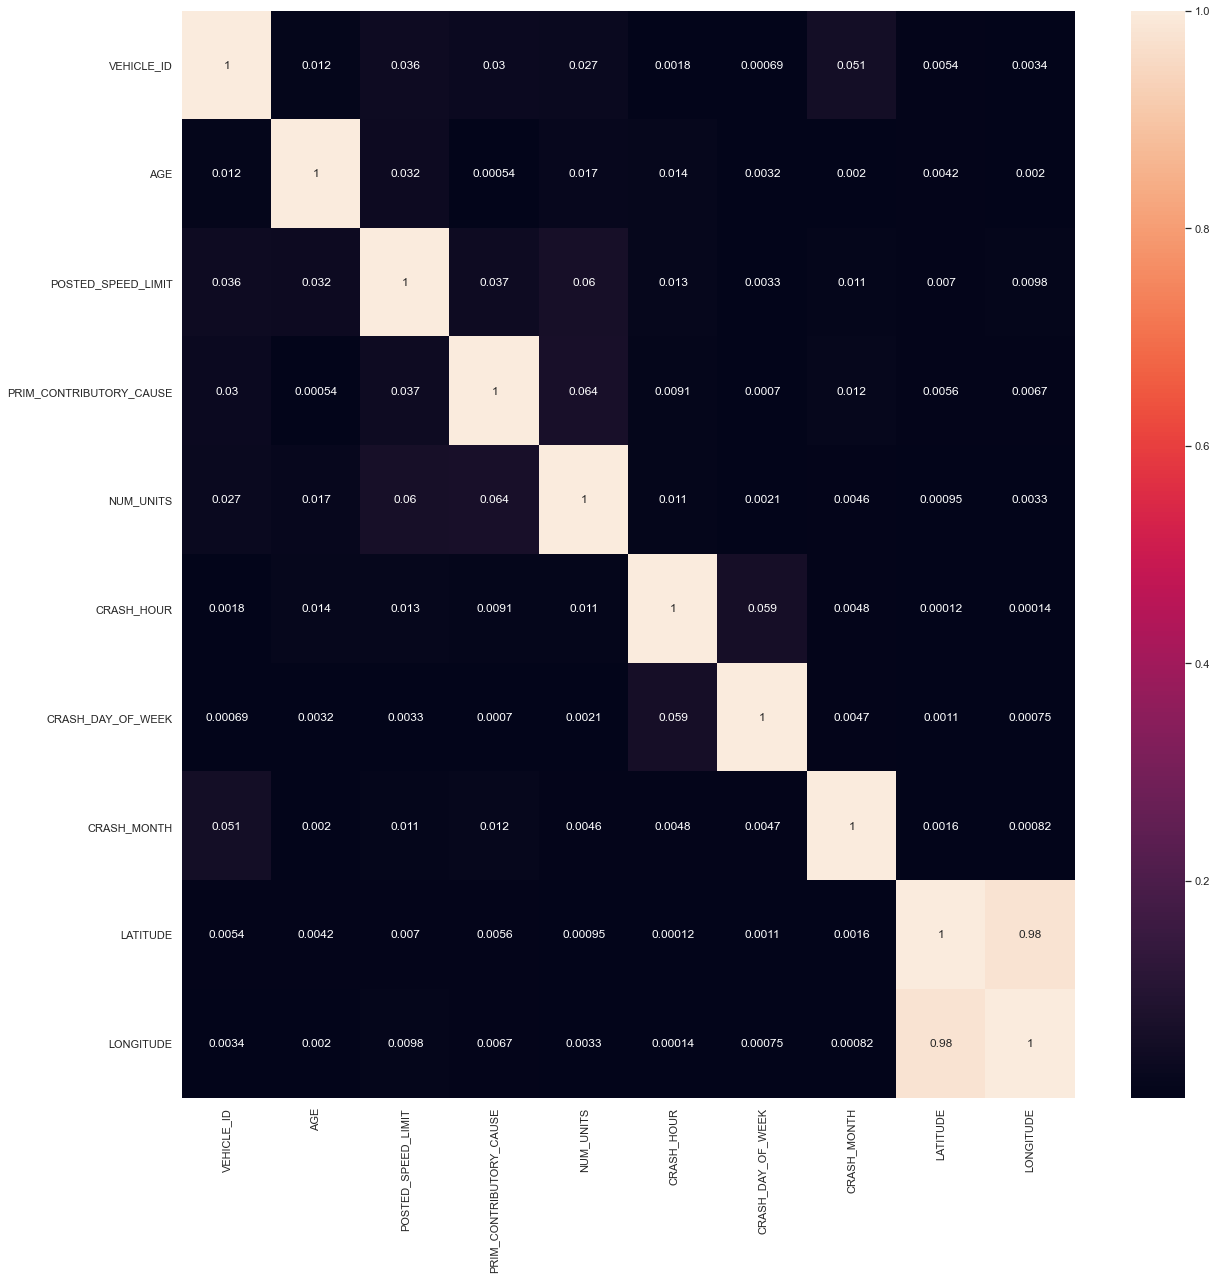

In [60]:
# checking for correlation
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df_combined.corr().abs(),annot=True);

From the correlation heatmap we can barely identify variables with high correlation that would probably lead to biase. Therefore no columns will be droped as a result of correlation/multi-collinearity.

##### 2.Scatter plots to check linear relationship

We will now visualize the linear relationship between the variables using scatter plots. Majority of the data is categorical and therefore we will not see most variables having a linear relationship.

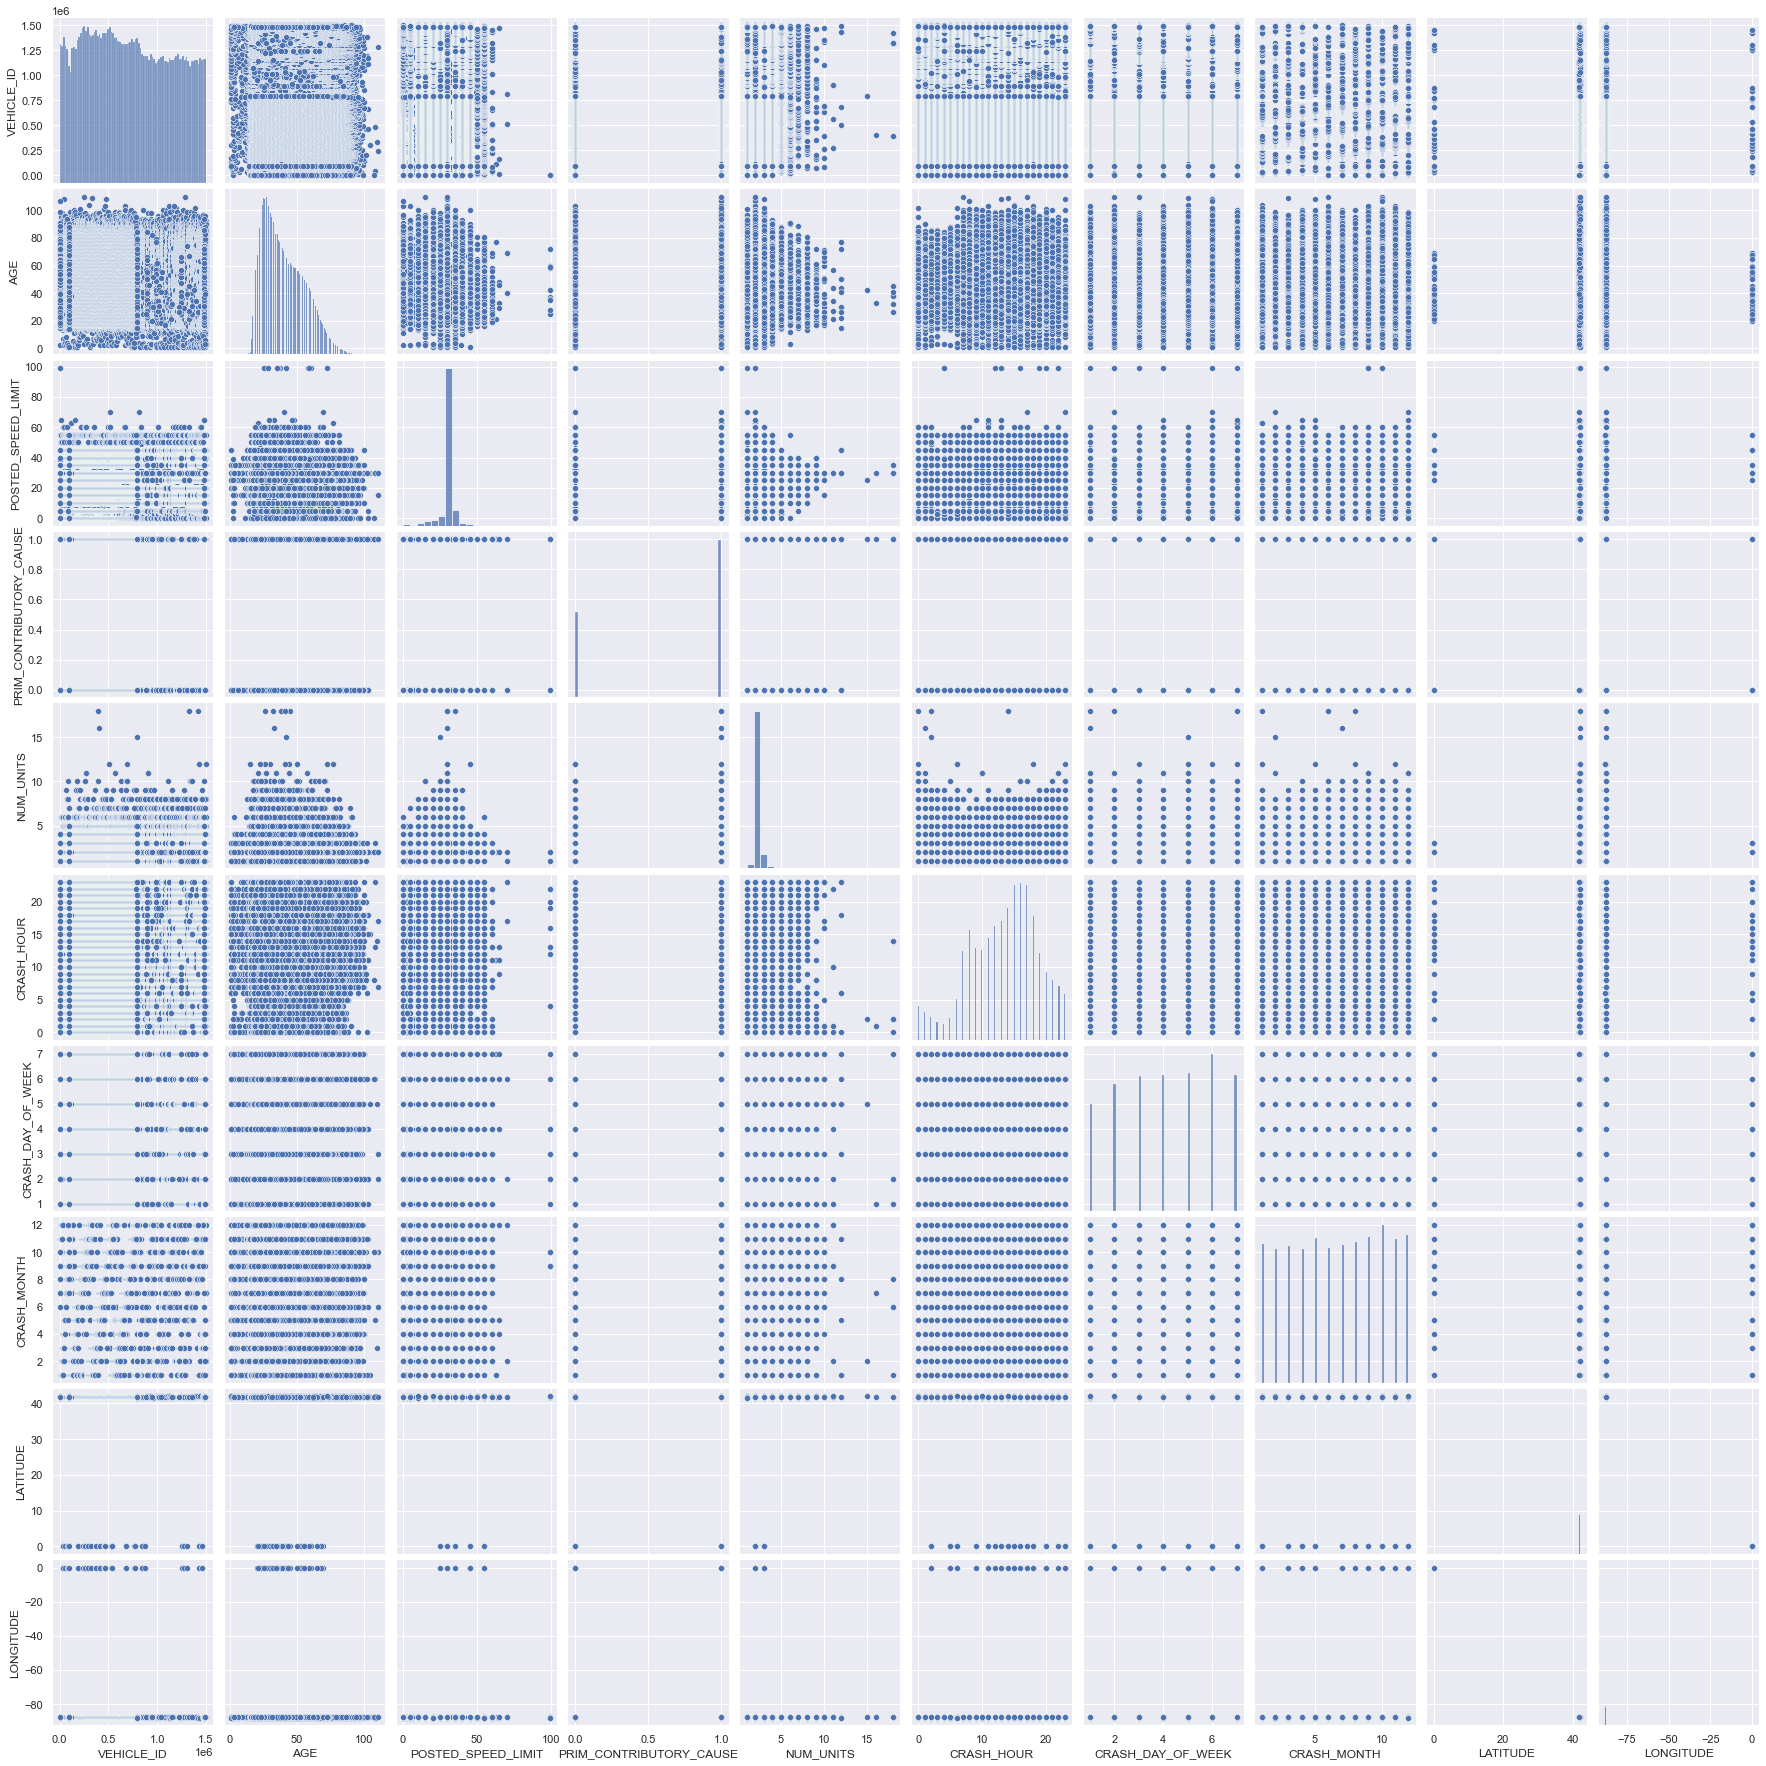

In [61]:
# We will first look up our combined data set
sns.pairplot(df_combined)

Those are too many plots for us to learn something from thus the need to look up the individual data sets.

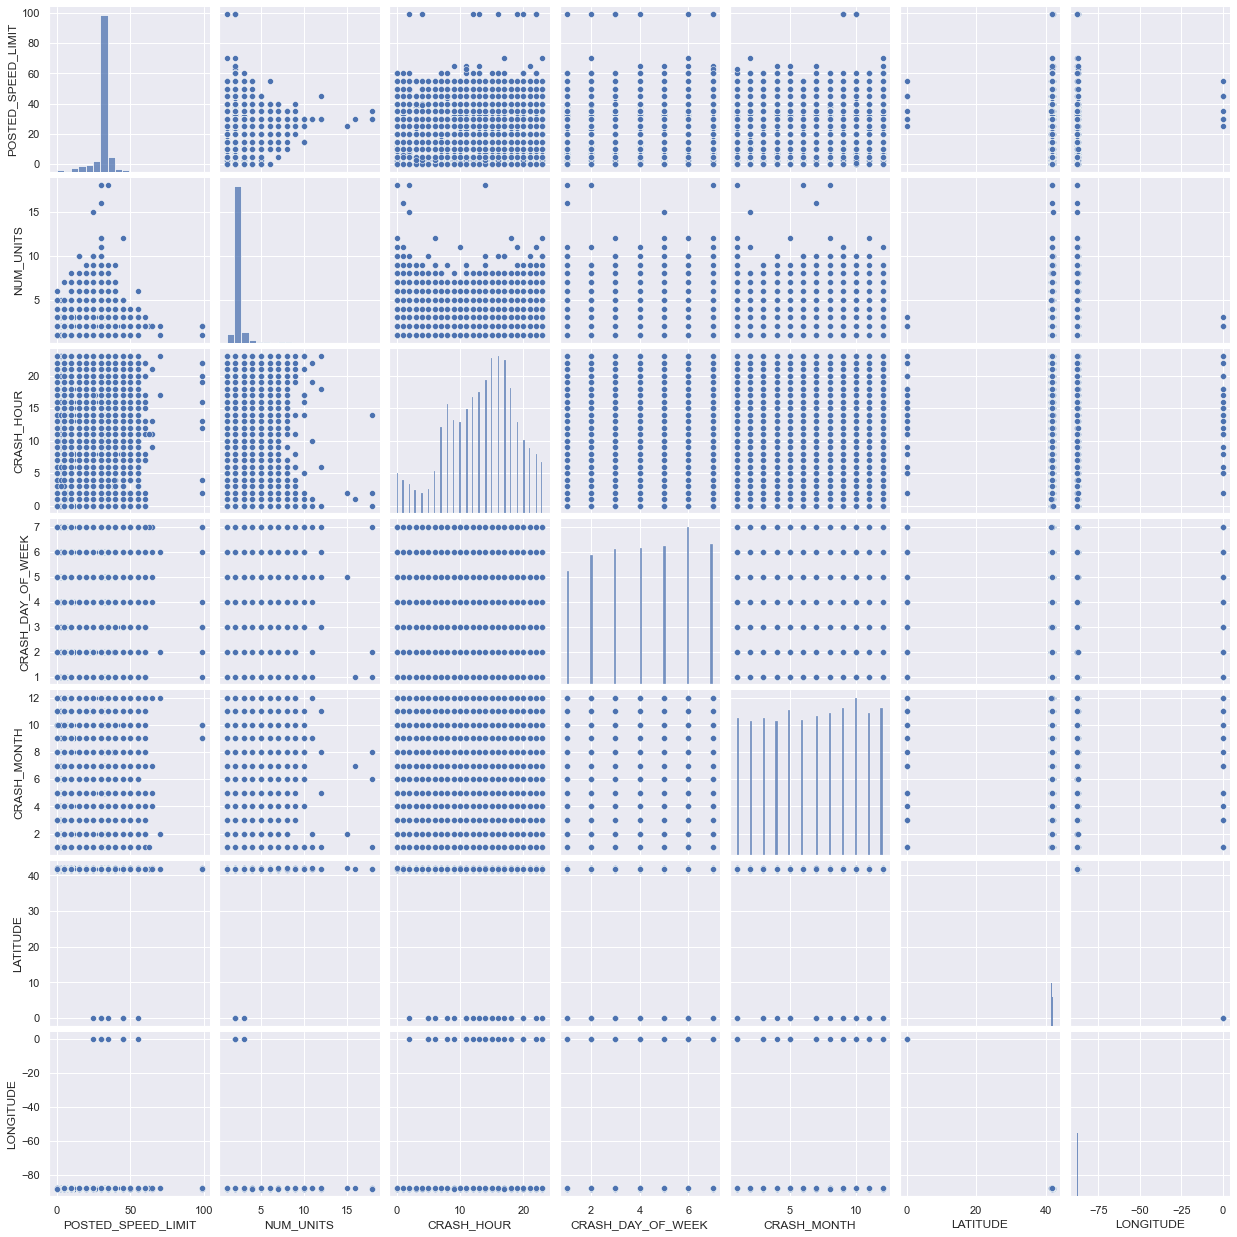

In [62]:
# Crashes data linear relationship
sns.pairplot(df_crashes_clean)

From this data set we can visualize linear relationships in variables such as crash day of the week with most accidents happening on the second to last day of the week and the least on the first day of the week. The crash hour as well has a linear relationship with most accidents occuring at around 3pm. These are just some of the insights we can get from this data.

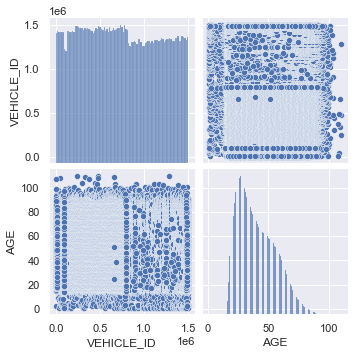

In [63]:
sns.pairplot(df_People_clean)

From this dataset we can see that most of the accidents are caused by drivers between 20 and 50. Lets further explore the relationship.

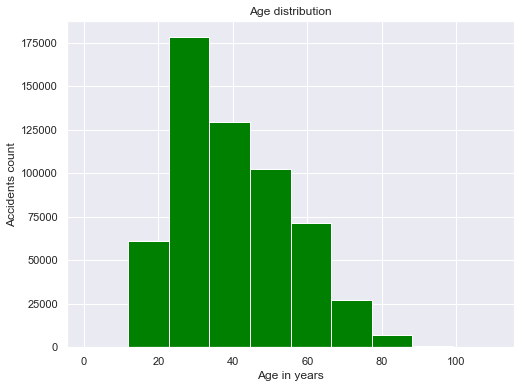

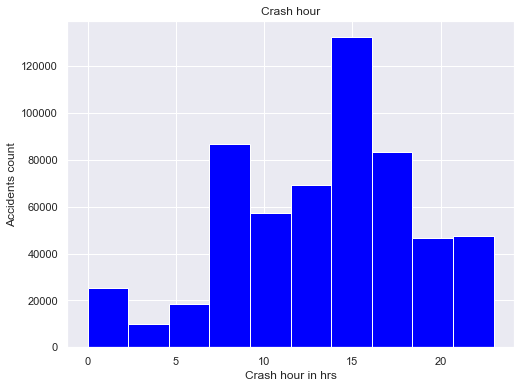

In [164]:
import matplotlib.pyplot as plt

# Distribution of age
plt.figure(figsize=(8, 6))
plt.hist(df_combined.AGE,color='green')
plt.xlabel('Age in years')
plt.ylabel('Accidents count')
plt.title('Age distribution')
plt.show()
# Crash hour distribution
plt.figure(figsize=(8, 6))
plt.hist(df_combined.CRASH_HOUR,color='blue')
plt.xlabel('Crash hour in hrs')
plt.ylabel('Accidents count')
plt.title('Crash hour')
plt.show()


We will now have to deal with the categorical data so as to generate a model.

In [65]:
# Previewing the columns
df_combined.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'SEX', 'AGE',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'CRASH_RECORD_ID_y', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'FIRST_CONTACT_POINT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [66]:
# Identifying the data types
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577689 entries, 0 to 577688
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERSON_TYPE              577689 non-null  object 
 1   CRASH_RECORD_ID          577689 non-null  object 
 2   VEHICLE_ID               577689 non-null  float64
 3   SEX                      577689 non-null  object 
 4   AGE                      577689 non-null  float64
 5   DRIVER_ACTION            577689 non-null  object 
 6   DRIVER_VISION            577689 non-null  object 
 7   PHYSICAL_CONDITION       577689 non-null  object 
 8   CRASH_RECORD_ID_y        577689 non-null  object 
 9   UNIT_NO                  577689 non-null  object 
 10  UNIT_TYPE                577689 non-null  object 
 11  VEHICLE_DEFECT           577689 non-null  object 
 12  VEHICLE_TYPE             577689 non-null  object 
 13  VEHICLE_USE              577689 non-null  object 
 14  TRAV

From the above we can tell that most of our variables are of the data type object therefore categorical columns. Further we have identified some more irrelevant columns that need to be dropped as they will not help in identifying the root cause of accidents in chicago.

In [67]:
# more irrelevant columns
More_columns = ['FIRST_CRASH_TYPE','CRASH_TYPE','CRASH_RECORD_ID','CRASH_RECORD_ID_y','TRAFFIC_CONTROL_DEVICE','FIRST_CONTACT_POINT']
# calling the function to drop the irrelevant columns
df_combined_1= ignore(df_combined,More_columns)

With that we will have a preview of the remaining data set to identify the categorical columns.

In [68]:
categorical_data = df_combined_1.select_dtypes(include=['object'])
categorical_data.head(3)

,PERSON_TYPE,SEX,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,UNIT_NO,UNIT_TYPE,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,...,MANEUVER,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,LOCATION
0,DRIVER,M,NONE,NOT OBSCURED,NORMAL,2,DRIVER,NONE,PASSENGER,PERSONAL,...,STRAIGHT AHEAD,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,POINT (-87.653404241798 41.736044089544)
1,DRIVER,F,UNKNOWN,NOT OBSCURED,NORMAL,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,...,MERGING,FUNCTIONING PROPERLY,CLEAR,DUSK,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",POINT (-87.700128203434 41.99766204922)
2,DRIVER,M,UNKNOWN,NOT OBSCURED,NORMAL,2,DRIVER,UNKNOWN,PASSENGER,PERSONAL,...,STRAIGHT AHEAD,FUNCTIONING PROPERLY,CLEAR,DUSK,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",POINT (-87.700128203434 41.99766204922)


In [69]:
categorical_data.columns

Index(['PERSON_TYPE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'DAMAGE', 'LOCATION'],
      dtype='object')

##### OHE-Dealing with categorical data

We intend to get dummies for the categorical columns. However we have two columns unit no and unit type that will not help us with identifying the accidents root cause therefore we ignore as well.

In [70]:
# more irrelevant columns
irrelevant_cat_col = ['UNIT_NO', 'UNIT_TYPE']
df_combined_clean = ignore(df_combined_1,irrelevant_cat_col)

In [71]:
categorical_data_clean = df_combined_clean.select_dtypes(include=['object'])
categorical_data_clean.columns

Index(['PERSON_TYPE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE', 'LOCATION'],
      dtype='object')

Having identified the categorical columns we will now separate them into two before getting dummies since the dataset is huge and we dont have enough memory to get dummies at once from all the columns.

In [72]:
cat_col_1 = ['PERSON_TYPE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'DEVICE_CONDITION']
cat_col_2 = ['WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT']

We then create a function to generate dummies from our data.

In [73]:
def get_dummies_from_columns(data, columns):
    for column in columns:
        dummy_data = pd.get_dummies(data[column], prefix=column)
        data = pd.concat([data, dummy_data], axis=1)
        data = data.drop(column, axis=1)
    return data

In [74]:
# calling the function on the first set
df_combined_final = get_dummies_from_columns(df_combined_clean,cat_col_1)


In [75]:
#calling the function on the second set
df_combined_final= get_dummies_from_columns(df_combined_final,cat_col_2)

Having dealt with the categorical columns lets have a preview of the most correlated variable to our target.

In [76]:
corr_matrix = df_combined_final.corr().abs()

# Exclude the target variable from the correlation matrix
predictor_corr = corr_matrix['PRIM_CONTRIBUTORY_CAUSE'].drop('PRIM_CONTRIBUTORY_CAUSE')

# Find the predictor variable with the highest correlation to the target variable
most_correlated_predictor = predictor_corr.idxmax()
correlation_value = predictor_corr[most_correlated_predictor]

print("Most correlated predictor variable:", most_correlated_predictor)
print("Correlation value:", correlation_value)

Most correlated predictor variable: DRIVER_ACTION_FAILED TO YIELD
Correlation value: 0.3308974485588299


From the correlation drivers actions are the most correlated to causing of accidents in chicago. 

## Modeling

We will start off with preparing our target variable and also checking for class imbalance. Class imbalance occurs when the distribution of classes in the target variable is highly skewed, meaning one class has a significantly larger number of instances compared to the other class(es). Dealing with class imbalance is important because it can affect the performance of machine learning models, particularly those that are sensitive to imbalanced data, such as classifiers.

In [77]:
df_combined_final['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)

1    0.6494
0    0.3506
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

We have no class imbalance. the classes are relatively balanced.

#### 1. Model evaluation metrics used

We will be using classification metrics to evaluate our model perfomance of our various models. The metrics will help us identify the best model to use.

##### 1. Precision 
Precision is a measure of the accuracy of positive predictions made by the  model. It calculates the proportion of correctly predicted positive instances (true positives) out of the total instances predicted as positive (true positives + false positives).
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$ 
Precision provides insights into the model's ability to make accurate positive predictions and is particularly useful when the cost of false positives is high (e.g., in medical diagnosis).

##### 2. Accuracy 
Accuracy is a metric that measures the overall correctness of the  model's predictions. It calculates the proportion of correctly predicted instances (both positive and negative) out of the total number of instances.
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

Accuracy gives an overall picture of how well the logistic regression model performs across all classes. However, accuracy alone can be misleading in the presence of class imbalance. For highly imbalanced datasets, accuracy may be high due to the dominance of the majority class predictions, while the minority class predictions may be less accurate.

##### 3. Recall
Recall (also known as sensitivity or true positive rate) is the proportion of true positive predictions (correctly classified positive instances) out of all actual positive instances in the dataset. It measures the classifier's ability to find all positive instances. The formula for recall is:

$$ \text{Recall} = \frac{\text{Number of True Positives }}{\text{True Positives + False Negatives}} $$

where TP is the number of true positives and FN is the number of false negatives.

Recall ranges from 0 to 1, with higher values indicating better performance. A recall of 1 means the classifier has correctly identified all positive instances.

##### 4. F1 Score
F1 score is a metric that combines precision and recall into a single value. It provides a balance between the two metrics and is especially useful when you want to consider both precision and recall together. The formula for F1 score is:

$$ \text{F1 Score} = 2 * \frac{\text{Precision * Recall }}{\text{TPrecision + Recall}} $$


where Precision is the number of true positives (TP) divided by the sum of true positives and false positives (TP + FP), and Recall is calculated as described above.

F1 score ranges from 0 to 1, with 1 being the best possible value. It considers both false positives and false negatives, making it a useful metric for imbalanced datasets or when you want to find a balance between precision and recall.

##### prepare the data

In [78]:
X = df_combined_final.drop(['PRIM_CONTRIBUTORY_CAUSE','LOCATION','DAMAGE','ALIGNMENT'], axis=1).copy()
y = df_combined_final.PRIM_CONTRIBUTORY_CAUSE

Train test split with random state 42. we will keep the default split of 0.25 for the testing data

In [79]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

After spliting our data we will use a standard scaler to scale the data

In [80]:
#Standard Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Baseline Model - Decision tree classifier.

A decision tree classifier is a type of supervised machine learning model that is used for classification tasks. It is a tree-like model where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents a class label or a decision outcome.
The decision rules in a decision tree classifier are learned from the training data during the model training process. The algorithm uses various criteria, such as Gini impurity or information gain, to determine the best feature and decision rule at each node that maximizes the separation between different classes.

In [83]:

# Baseline Decision tree classifier model
#the classifier.
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train the classifier on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Calculate precision
precision_dt = precision_score(y_test, y_pred)

# Calculate recall
recall_dt = recall_score(y_test, y_pred)

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)

print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Accuracy:", accuracy_dt)

Precision: 0.7124979115782104
Recall: 0.955783946466878
F1 Score: 0.8164016919486582
Accuracy: 0.7210970551781919


#### Conclusion

Based on the provided evaluation metrics.

Precision: The precision score of 0.712 indicates that when the model predicts a positive instance, it is correct approximately 71.25% of the time. It represents the ability of the model to avoid false positives.

Recall: The recall score of 0.956 suggests that the model is able to identify approximately 95.68% of the actual positive instances. It measures the model's ability to avoid false negatives.

F1 Score: The F1 score of 0.816 represents the harmonic mean of precision and recall. It provides a balance between the two metrics and indicates the overall performance of the model. Higher values indicate better performance.

Accuracy: The accuracy score of 0.721 indicates that the model correctly predicts the class labels for approximately 72.11% of the instances in the dataset. It represents the overall correctness of the model's predictions.

Our model seems to be pretty good at classifying if a crash was easily Avoidable or Unavoidable. However,ensemble methods, such as ada boosting and gradient boosting, are often used to improve the performance of decision tree classifiers by combining multiple decision trees.

### 2. Gradient Boosting model

To improve our baseline we will use gradient boosting model. Gradient boosting is a popular machine learning technique that builds an ensemble of weak prediction models (typically decision trees) to create a strong predictive model. It is a type of boosting algorithm that iteratively combines multiple weak models to improve the overall performance.

In [84]:
# Initialize the classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier to the training data
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test_scaled)

# Calculate precision
precision_gb = precision_score(y_test, y_pred)

# Calculate recall
recall_gb = recall_score(y_test, y_pred)

# Calculate F1 score
f1_gb = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred)

print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("Accuracy:", accuracy_gb)

Precision: 0.7389377537212449
Recall: 0.9324752665450005
F1 Score: 0.8245013895507669
Accuracy: 0.7424579187525533


#### Conlusion

Based on the provided evaluation metrics for the gradient boosting model, here is a brief conclusion:

Precision: The precision score of 0.739 indicates that when the model predicts a positive instance, it is correct approximately 73.9% of the time. It represents the ability of the model to avoid false positives.

Recall: The recall score of 0.932 suggests that the model is able to identify approximately 93.2% of the actual positive instances. It measures the model's ability to avoid false negatives.

F1 Score: The F1 score of 0.825 represents the harmonic mean of precision and recall. It provides a balance between the two metrics and indicates the overall performance of the model. Higher values indicate better performance.

Accuracy: The accuracy score of 0.742 indicates that the model correctly predicts the class labels for approximately 74.2% of the instances in the dataset. It represents the overall correctness of the model's predictions.

In conclusion, the gradient boosting model performs well with a relatively high recall score, indicating its effectiveness in identifying positive instances. The precision score is also decent, suggesting a reasonable rate of false positives. The F1 score provides an overall assessment, considering both precision and recall. The accuracy score indicates the overall correctness of the model's predictions.

We will try improve these metrics using ADA boosting model

### 3. ADA boosting classification model

We will as well try to improve our model usin our third model. AdaBoost (Adaptive Boosting) is a machine learning algorithm that combines multiple weak learners to create a strong predictive model. It is a boosting algorithm that focuses on instances that were previously misclassified, adjusting the weights of these instances to improve the overall performance of the model.

In [85]:
# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier()

# Fit the classifier to the training data
adaboost.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = adaboost.predict(X_test_scaled)

# Calculate precision
precision_ada = precision_score(y_test, y_pred)

# Calculate recall
recall_ada = recall_score(y_test, y_pred)

# Calculate F1 score
f1_ada = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred)

print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1 Score:", f1_ada)
print("Accuracy:", accuracy_ada)

Precision: 0.7485311191640572
Recall: 0.9082487539888366
F1 Score: 0.8206913511193832
Accuracy: 0.742513311591644


#### Conclusion

Based on the provided evaluation metrics for the AdaBoost model, here is a brief conclusion:

We have a slight improvement from our previous model by about 0.05 in the four metrics.

Precision: The precision score of 0.749 indicates that when the model predicts a positive instance, it is correct approximately 74.9% of the time. It represents the ability of the model to avoid false positives.

Recall: The recall score of 0.908 suggests that the model is able to identify approximately 90.8% of the actual positive instances. It measures the model's ability to avoid false negatives.

F1 Score: The F1 score of 0.821 represents the harmonic mean of precision and recall. It provides a balance between the two metrics and indicates the overall performance of the model. Higher values indicate better performance.

Accuracy: The accuracy score of 0.743 indicates that the model correctly predicts the class labels for approximately 74.3% of the instances in the dataset. It represents the overall correctness of the model's predictions.

In conclusion, the AdaBoost model performs well with a relatively high recall score, indicating its effectiveness in identifying positive instances. The precision score is also decent, suggesting a reasonable rate of false positives. The F1 score provides an overall assessment, considering both precision and recall. The accuracy score indicates the overall correctness of the model's predictions.

### 4. Logistic Regression model.

Our fourth model is the logistic regression model. We are intending to improve the classification metrics for our model.
The logistic regression model is a popular algorithm used for binary classification tasks. It models the relationship between a set of independent variables (predictors) and a binary dependent variable (target) by estimating the probabilities of the target variable belonging to each class.

In [86]:
# Instantiate the regressor
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate precision
precision_log = precision_score(y_test, y_pred)

# Calculate recall
recall_log = recall_score(y_test, y_pred)

# Calculate F1 score
f1_log = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred)

print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)
print("Accuracy:", accuracy_log)

Precision: 0.7488237423090843
Recall: 0.9053351689986019
F1 Score: 0.8196751408335023
Accuracy: 0.7415647092222153


#### Conclusion

Based on the provided evaluation metrics for the logistic regression model, here is a brief conclusion:

Precision: The precision score of 0.749 indicates that when the model predicts a positive instance, it is correct approximately 74.9% of the time. It represents the ability of the model to avoid false positives.

Recall: The recall score of 0.905 suggests that the model is able to identify approximately 90.5% of the actual positive instances. It measures the model's ability to avoid false negatives.

F1 Score: The F1 score of 0.820 represents the harmonic mean of precision and recall. It provides a balance between the two metrics and indicates the overall performance of the model. Higher values indicate better performance.

Accuracy: The accuracy score of 0.742 indicates that the model correctly predicts the class labels for approximately 74.2% of the instances in the dataset. It represents the overall correctness of the model's predictions.

In conclusion, the logistic regression model performs well with a relatively high recall score, indicating its effectiveness in identifying positive instances. The precision score is also decent, suggesting a reasonable rate of false positives. The F1 score provides an overall assessment, considering both precision and recall. The accuracy score indicates the overall correctness of the model's predictions.

### 5. XG Boost 

Our next model will be the extreem gradient boosting model that will aim to improve our classification metrics. 

In [87]:
# Instantiating the classifier
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate precision
precision_xg = precision_score(y_test, y_pred)

# Calculate recall
recall_xg = recall_score(y_test, y_pred)

# Calculate F1 score
f1_xg = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy_xg = accuracy_score(y_test, y_pred)

print("Precision:", precision_xg)
print("Recall:", recall_xg)
print("F1 Score:", f1_xg)
print("Accuracy:", accuracy_xg)

Precision: 0.7568794351342264
Recall: 0.9129339694126939
F1 Score: 0.8276145648398535
Accuracy: 0.753259522375245


#### Conclusion

Based on the metrics you provided, it seems that the XGBoost model performs well in terms of precision, recall, and F1 score, indicating good predictive capability and a balance between precision and recall. The accuracy score also indicates that the model predicts correctly for approximately 75.33% of the instances. It is the overal best model to predict avoidable and  unavoidable accidents.

### 6. Random Forest classification model.

Finally we will do the random forest model to see if we can improve the model metrics.

In [88]:
from sklearn.ensemble import RandomForestClassifier
# Create the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)

Precision: 0.7662934590453742
Recall: 0.9021014098336162
Accuracy: 0.7579886860126157
F1 Score: 0.8286700260779201


#### Conclusion

Our final model is the best overal model with the highest accuracy score of 75.8% compared to 75.3% of the XG boost. The Random Forest model demonstrates reasonably good performance. It achieves a precision of 0.766, indicating that when it predicts a positive instance, it is correct approximately 76.6% of the time. The recall of 0.902 suggests that the model captures a high percentage of actual positive instances. The accuracy of 0.758 indicates the overall correctness of the model's predictions. The F1 Score of 0.829 represents a balance between precision and recall.

## Evaluation


Our model underwent thorough evaluation to assess its performance in predicting preventable and less preventable crashes in Chicago. Key evaluation metrics such as precision, recall, accuracy, and F1 score were utilized to measure its effectiveness.

Precision was used to determine the proportion of correctly predicted preventable and less preventable crashes out of all predicted crashes. Recall measured the model's ability to identify actual preventable and less preventable crashes. The F1 score provided a balanced assessment by considering both precision and recall. Lastly, accuracy gauged the overall correctness of the model's predictions.

Based on these evaluation metrics, our model demonstrated promising performance, achieving high precision, recall, and F1 score values. This indicates its capability to accurately differentiate between preventable and less preventable crashes.

These evaluation results provide valuable insights for decision-making and recommendations to the Vehicle Safety Board of Chicago. By leveraging our model's performance, the board can implement targeted interventions to reduce preventable crashes and allocate resources efficiently to enhance road safety in the city.

### Classification metrics table

From all the models we will create a clasification metrics table containing the accuracy, recall, F1 score, precision so as to identify the best model.

In [155]:
# Function to create classification metric table.
def create_dataframe(data):
    data = {
        'Model': ['Decision Tree', 'Gradient Boosting','ADA Boosting','Logistic regresion','XG Boost', 'Random forest'],
        'Accuracy': [accuracy_dt, accuracy_gb, accuracy_ada, accuracy_log, accuracy_xg, accuracy_rf],
        'Precision': [precision_dt, precision_gb, precision_ada, precision_log, precision_xg, precision_rf],
        'Recall': [recall_dt, recall_gb, recall_ada, recall_log, recall_xg, recall_rf],
        'F1 Score': [f1_dt, f1_gb, f1_ada, f1_log, f1_xg, f1_rf]
    }
    df = pd.DataFrame(data)
    # Round off values to 3 decimal places
    df = df.round(3)
    return df

In [156]:
# Classification metric dataframe
classification_mertics_df = create_dataframe(data)
classification_mertics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.721,0.712,0.956,0.816
1,Gradient Boosting,0.742,0.739,0.932,0.825
2,ADA Boosting,0.743,0.749,0.908,0.821
3,Logistic regresion,0.742,0.749,0.905,0.820
4,XG Boost,0.753,0.757,0.913,0.828
5,Random forest,0.758,0.766,0.902,0.829


### Visualizing classification metrics

We will create bar graphs to visually compare the performance of different models and identify the best model overall. By plotting the evaluation metrics such as precision, recall, accuracy, and F1 score for each model, we can easily analyze and compare their performance. The bar graphs will provide a clear representation of how each model performs in terms of these metrics, allowing us to identify the model that achieves the highest overall performance. This visual analysis will assist us in making data-driven decisions and selecting the most effective model for our specific task of identifying preventable and non-preventable car crashes. 

In [157]:
# functiion to create bar plots
def create_bar_graphs(df, columns):
    x = df[columns[0]]
    for column in columns[1:]:
        y = df[column]
        plt.figure(figsize=(9, 8))
        plt.bar(x, y)
        plt.xlabel(columns[0])
        plt.ylabel(column)
        plt.title('Bar Graph of ' + column)
        plt.xticks(rotation=45)
        plt.show()

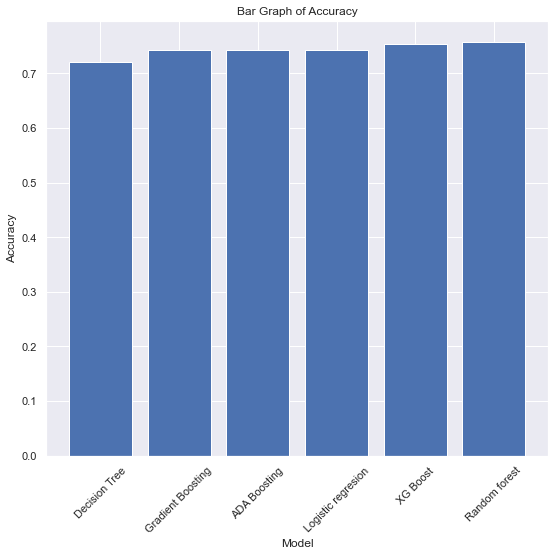

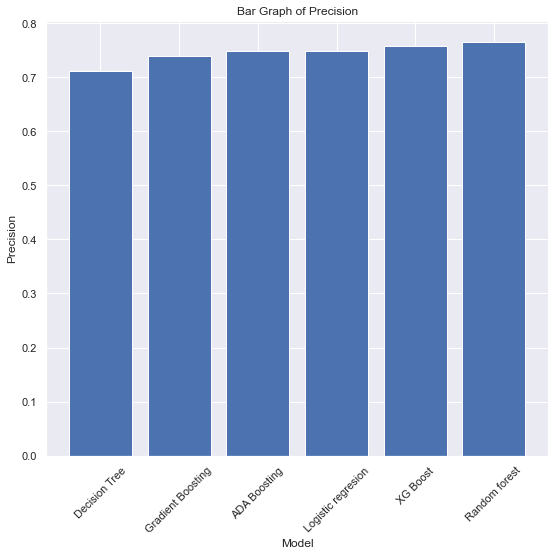

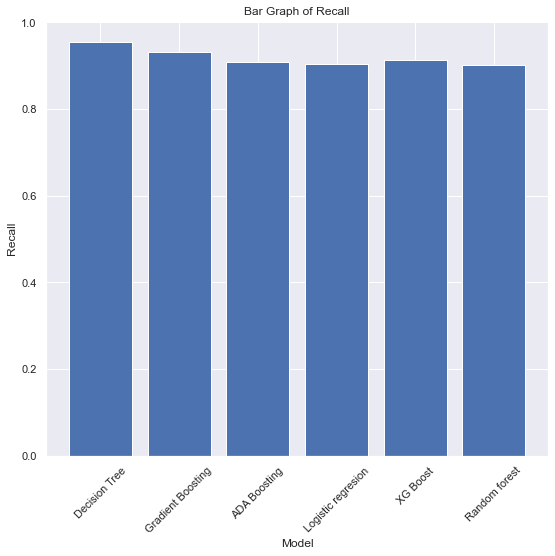

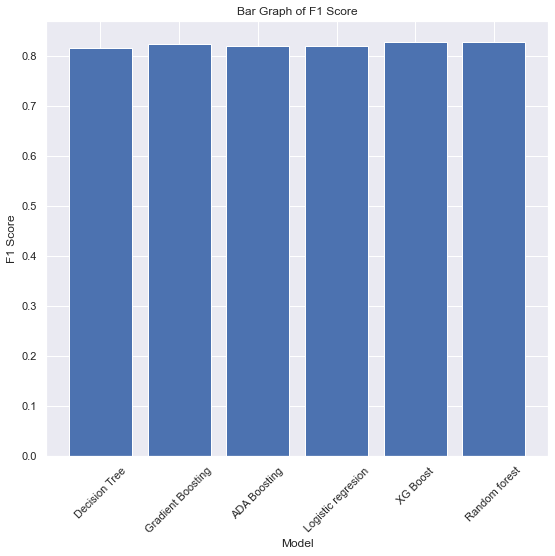

In [158]:
create_bar_graphs(classification_mertics_df, classification_mertics_df.columns)

### Feature importance

We will plot the features against the target column to identify the key factors that contribute to accidents in Chicago. By visualizing the relationship between each feature and the target variable, we can gain insights into the variables that have the most significant impact on the occurrence of accidents. This analysis will help us understand the underlying patterns and correlations between the features and the target, allowing us to identify the most influential factors that contribute to accidents in the city. These findings will provide valuable information for the Vehicle Safety Board of Chicago to develop targeted strategies and interventions to reduce accidents and improve road safety.

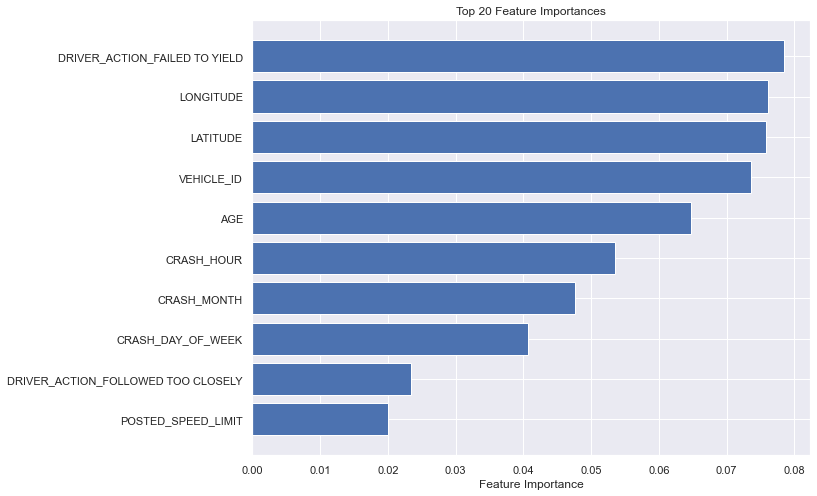

In [152]:


# Fit the random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Convert standardized array to dataframe
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)

# Calculate feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_final.columns[i] for i in indices]

# Select top 20 feature importances and corresponding names
top_importances = importances[indices][:10]
top_names = names[:10]

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_names)), top_importances, align='center')
ax.set_yticks(range(len(top_names)))
ax.set_yticklabels(top_names)
ax.invert_yaxis()
ax.set_xlabel('Feature Importance')
ax.set_title('Top 20 Feature Importances')

plt.show()


From the feature importance we gan generate some insights. First the drivers actions are the highest contributors of accidents in chicago. Location metrics are expected since we are considering the same location chicago. Drivers age is equally a high contributor of accidents in chicago where drivers aged 20- 30 are recorded to have the most accidents. High speed limits are also a concerning contributor to accidents in chicago.

### Findings


In conclusion, the objective of the project was to identify the causes of accidents in Chicago in order to help reduce them. The target variable was categorized into two classes: avoidable and unavoidable accidents. After evaluating multiple machine learning models, the Random Forest algorithm emerged as the best model for this task.

The Random Forest model achieved the following classification metrics:

Precision: 0.7663
Recall: 0.9021
Accuracy: 0.7580
F1 Score: 0.8287

These metrics indicate that the model performed well in predicting both avoidable and unavoidable accidents. The high precision suggests that the model had a low rate of false positives, accurately identifying avoidable accidents. The high recall indicates that the model had a low rate of false negatives, successfully capturing a large portion of actual avoidable accidents. The accuracy score reflects the overall correctness of the model's predictions, while the F1 score balances precision and recall.

These results suggest that the random forest model can effectively identify the causes of accidents in Chicago, making it a valuable tool for reducing accidents by targeting specific risk factors. It provides a reliable framework for identifying avoidable and unavoidable accidents, enabling policymakers and relevant stakeholders to allocate resources and implement targeted interventions to mitigate the identified causes.

By leveraging the insights gained from the Random Forest model, it is possible to identify the key factors contributing to accidents in Chicago. This information can be used to implement targeted measures and interventions aimed at reducing the occurrence of accidents and improving road safety in the city.

### Evaluation
In our project, we aimed to address the business problem of distinguishing avoidable and unavailable crashes and provide recommendations to the relevant authorities. To evaluate our models, we focused on metrics such as precision and accuracy, which provide insights into the model's ability to correctly identify true positive cases and minimize errors.

By employing techniques like recursive feature elimination and selecting relevant variables, we gained valuable insights and developed an inferential model that allows us to make informed recommendations. Our findings suggest that allocating more resources to driver education for individuals between the ages of 20 and 39 could significantly reduce the overall number of accidents in Chicago. This targeted investment in driver education has the potential to yield efficient and effective results to help reduce the accidents. Another issue to bring to their concern is that most accidents happen from 2pm -4pm therefore police can also be deployed during the same hours to monitor the traffic. High speedlimits have also been a contributing factor to the most accidents, lowering the maximum speed limit would reduce the crashes as well as having stern purnishments for overspeeding.

Furthermore, addressing infrastructure issues that contribute to non-preventable crashes can also be a worthwhile endeavor. Fixing roads or addressing visibility challenges can help mitigate the occurrence of such incidents.

It is important to acknowledge the limitations of our data, including categories labeled as 'not determined' by the reporting officer, which introduces uncertainties into our model. Additionally, the lack of economic data and public transportation information poses further limitations. The presence of vague descriptions under the 'Other' category, such as obscured vision, calls for deeper investigation and clarification.

Overall, our evaluation provides valuable insights and recommendations to the relevant authorities, facilitating informed decision-making to enhance road safety in Chicago.

### Recommendations
Based on our analysis, we have several recommendations to Vehicle Safety Board of Chicago to improve road safety and reduce preventable crashes in the Chicago area.

1. Fix damaged or defective roads: We recommend prioritizing the repair of roads in hot spot areas that have a higher frequency of non-preventable crashes. By addressing infrastructure issues, such as potholes or inadequate signage, we can create safer road conditions and minimize the occurrence of such incidents.

2. Invest in an online driver and behavior education campaign: Implementing an online driver education program can have a significant impact on reducing preventable crashes. This approach is not only affordable but also easily accessible to a wide audience. By providing educational resources and promoting safe driving practices, we can enhance driver awareness and decision-making skills.

3. Target the younger audience (age 20-39): Our analysis indicates that drivers within the age range of 20-39 accounted for a significant proportion of preventable crashes. Therefore, we recommend tailoring the driver education campaign to specifically target this demographic. By focusing on this age group, we can effectively address their unique driving behaviors and contribute to a substantial reduction in preventable accidents.

4. Increase traffic policing during the hours for 2 pm - 6pm and moreso on weekends. Most accidence seem to happen during this time period. Targeting peak traffic hours: By focusing on the time period of 2 pm - 6 pm, when traffic congestion is typically high, increased traffic policing can help manage traffic flow more efficiently. This can reduce the likelihood of accidents caused by reckless driving, speeding, or aggressive behavior during peak hours.

By implementing these recommendations, we believe we can make substantial progress in reducing preventable crashes in the Chicago area. It is crucial to allocate resources and collaborate with relevant stakeholders to ensure the successful implementation of these measures. Together, we can create a safer road environment and work towards the goal of minimizing accidents and their associated consequences.